In [1]:
import torch
from transformers import BertTokenizer, BertModel
import matplotlib.pyplot as plt
import seaborn as sns

# Load pre-trained BioBERT
tokenizer = BertTokenizer.from_pretrained('dmis-lab/biobert-base-cased-v1.1')
model = BertModel.from_pretrained('dmis-lab/biobert-base-cased-v1.1')

def get_attention_scores(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs, output_attentions=True)
    # Extract attention from the first layer, head 0 (for simplicity)
    attention = outputs.attentions[0][0, 0].detach().numpy()
    tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
    return attention, tokens

def plot_heatmap(attention, tokens):
    plt.figure(figsize=(10, 8))
    sns.heatmap(attention, xticklabels=tokens, yticklabels=tokens, cmap="Reds")
    plt.title("Attention Heatmap")
    plt.show()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


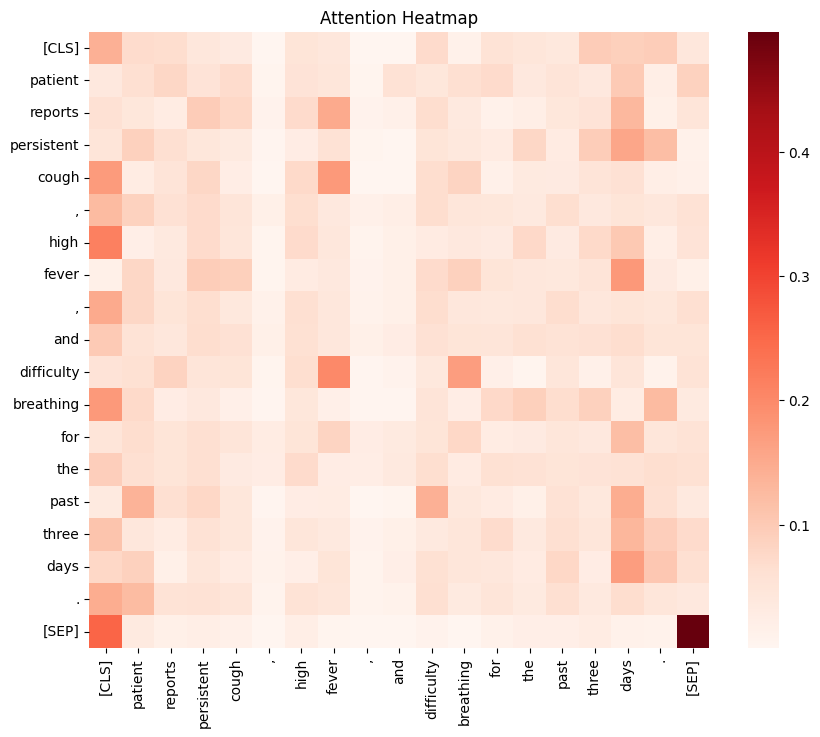

In [2]:
text = "Patient reports persistent cough, high fever, and difficulty breathing for the past three days."
attention, tokens = get_attention_scores(text)
plot_heatmap(attention, tokens)

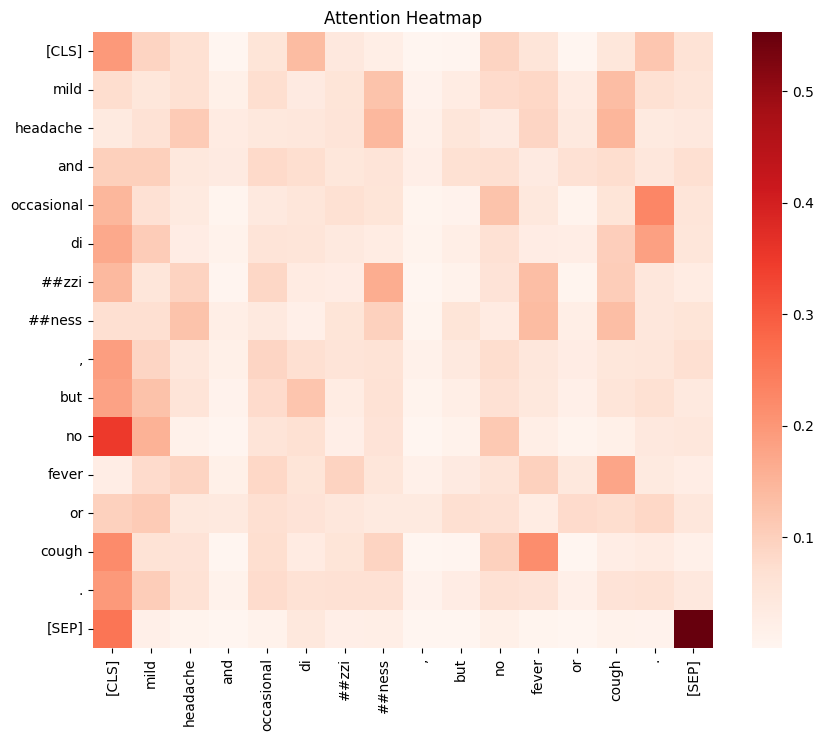

In [3]:
text = "Mild headache and occasional dizziness, but no fever or cough."
attention, tokens = get_attention_scores(text)
plot_heatmap(attention, tokens)

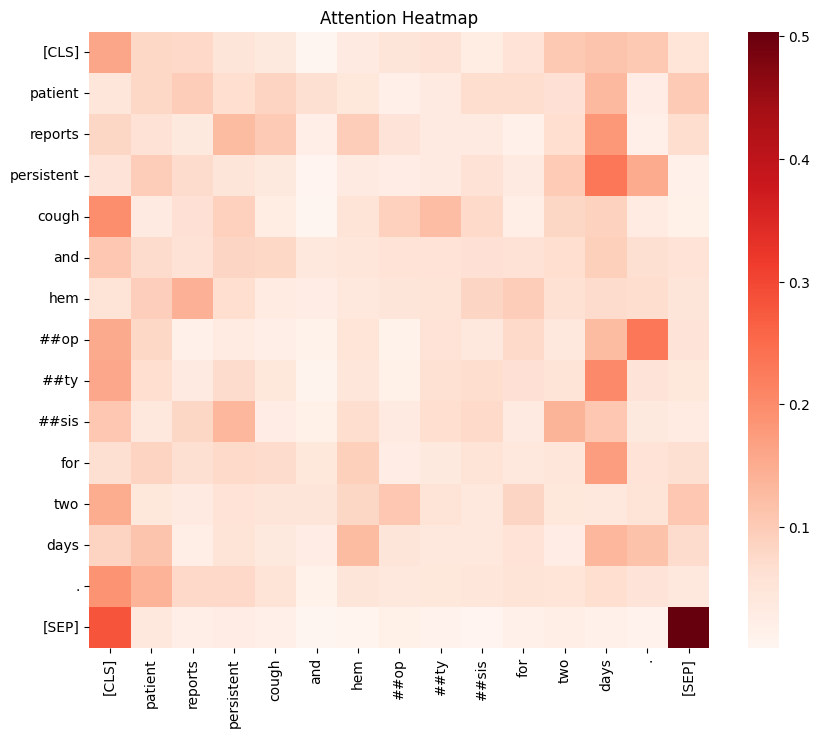

In [4]:
text = "Patient reports persistent cough and hemoptysis for two days."
attention, tokens = get_attention_scores(text)
plot_heatmap(attention, tokens)